# Red Neuronal Convolucional

Este tipo de redes se utiliza para el tratamiento de imagenes.
Su aplicacción más directa es la de reconocimiento facial, detección de objetos o clasificación de imagenes.
En esta sección vamos a realizar un clasificador de imagenes, con la diferencia que vamos a utilizar un dataset clasido el **cifar10**
para centrarnos en el uso de Tensorflow 2.0, este dataset esta compuesto por diferentes clases de objetos.
Categorias:
- Avión
- Coche
- Pajaro
- Gato
- Ciervo
- Perro
- Rana
- Caballo
- Barco
- Camión


### Paso 1 : Importar Librerias

In [108]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.16.1'

### Pase 2: Pre procesado de datos

#### Cargar el dataset Cifar10

In [109]:
# Configurar el nombre de las clases del dataset
class_names = ['avión','coche','pajaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [110]:
# Cargar el dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### Normalización de las imagenes

In [111]:
x_train = x_train/255.0

In [112]:
x_train.shape

(50000, 32, 32, 3)

In [113]:
x_test = x_test/255.0

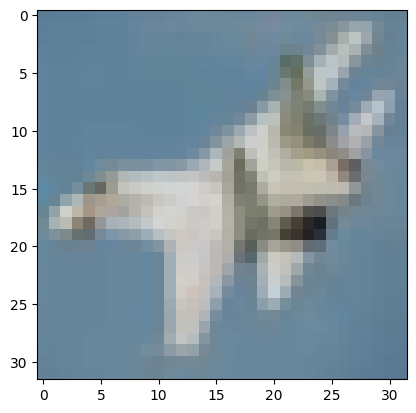

In [114]:
plt.imshow(x_test[10])

In [115]:
y_test[10]

array([0], dtype=uint8)

### Paso 3: Construir una red neuronal convolucional 

### Definir el modelo

In [116]:
model = tf.keras.models.Sequential()

### Añadir la primer capa de convolución

Hyper parametros de la primer capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- Padding: same
- Función de activación: ReLu
- input_shape: (32, 32, 3)

In [117]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

### Añadir la segunda capa de convolución y la capa max-pooling

Hyper parámetros de la capa de la RNC:

- Filtros: 32
- Tamaño del kernel: 3
- Padding: same
- Función de activación: ReLu

Hyper parámetros de la capa de MaxPool:

- pool_size: 2
- strides: 2
- padding: valid



In [118]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

In [119]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la tercer capa convolucional

Hyper parámetros de la capa de la RNC

- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de activación: relu

In [120]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

### Añadir la cuarta capa convilucional y la capa de max pooling

Hyper parámetros de la capa de la RNC

- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de activación: relu

Hyper parámetros de la capa de la MaxPool:

- pool_size: 2
- strides: 2
- padding: valid

In [121]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))


In [122]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la capa de flattening

In [123]:
model.add(tf.keras.layers.Flatten())

### Añadir la primer capa fully-conected

Hyper parámetros de la primer capa totalmente conectada

- units/neurons: 128
- activation: relu

In [124]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:

- units/neurons: 10 (number of classes)
- activation: softmax

In [125]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [126]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compilar el modelo

**sparse_categorilcal_accuracy**

sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el indice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [127]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['sparse_categorical_accuracy'])

### Entrenar el modelo

In [128]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - loss: 1.6655 - sparse_categorical_accuracy: 0.3884
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - loss: 0.9452 - sparse_categorical_accuracy: 0.6677
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - loss: 0.7288 - sparse_categorical_accuracy: 0.7431
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - loss: 0.5912 - sparse_categorical_accuracy: 0.7909
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - loss: 0.4911 - sparse_categorical_accuracy: 0.8282


### Evaluar el modelo

In [129]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7410 - sparse_categorical_accuracy: 0.7509


In [132]:
print("test_loss: ${0}, test_accuracy: ${1}".format(test_loss, test_accuracy))

test_loss: $0.7632331848144531, test_accuracy: $0.7433000206947327
